In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime

In [2]:
# read data
df_bc = pd.read_csv('raw_data/bitcoin_raw.csv')
df_gold = pd.read_csv('raw_data/gold_df.csv')
df_oil = pd.read_csv('raw_data/oil_price_raw.csv')
df_raw = pd.read_csv('raw_data/raw_v2_dataset.csv')
df_vix = pd.read_csv('raw_data/vixcurrent.csv',skiprows=[0])

df_bc['Date'] = pd.to_datetime(df_bc.Date)
df_gold['Date'] = pd.to_datetime(df_gold.Date)
df_oil['Date'] = pd.to_datetime(df_oil.Date)
df_raw['Date'] = pd.to_datetime(df_raw.Date)
df_vix['Date'] = pd.to_datetime(df_vix.Date)

df_bc = df_bc.sort_values('Date')
df_gold = df_gold.sort_values('Date')
df_oil = df_oil.sort_values('Date')
df_raw = df_raw.sort_values('Date')
df_vix = df_vix.sort_values('Date')

# id1 = pd.date_range(df_bc['Date'].min(), df_bc['Date'].max())
# id2 = pd.date_range(df_gold['Date'].min(), df_gold['Date'].max())
# id3 = pd.date_range(df_oil['Date'].min(), df_oil['Date'].max())
# id4 = pd.date_range(df_raw['Date'].min(), df_raw['Date'].max())
# id5 = pd.date_range(df_vix['Date'].min(), df_vix['Date'].max())


df_bc.set_index('Date', inplace=True)
df_gold.set_index('Date', inplace=True)
df_oil.set_index('Date', inplace=True)
df_raw.set_index('Date', inplace=True)
df_vix.set_index('Date', inplace=True)

df_bc= df_bc.asfreq('D')
df_gold= df_gold.asfreq('D')
df_oil= df_oil.asfreq('D')
df_raw= df_raw.asfreq('D')
df_vix= df_vix.asfreq('D')

In [3]:
df_sp500 = df_raw[['SP500 close index']].copy(deep=True)
df_sp500 = df_sp500.interpolate().round(2)
df_sp500.columns= ['Close']
df_sp500.info()
df_sp500.to_csv('preprocess/sp500.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 2014-12-01 to 2020-05-14
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1992 non-null   float64
dtypes: float64(1)
memory usage: 31.1 KB


In [4]:
bc_of_raw = df_raw[['Volume BTC','BTC n-transactions','BTC google search interest']].copy(deep=True)
bc_of_raw = bc_of_raw.interpolate().round(2)

In [5]:
df_bc=df_bc.drop(['Currency'], axis=1)
df_bc=df_bc.round(2)
df_bc.columns = ['Close', 'Open', 'High', 'Low']
# df_bc = df_bc.merge(bc_of_raw,left_index=True, right_index=True ,how='outer')
# df_bc.columns = ['Close', 'Open', 'High', 'Low','Volume','n-transactions','interest']
df_bc.columns = ['Close', 'Open', 'High', 'Low']
df_bc =df_bc.interpolate().round(2)
df_bc.to_csv('preprocess/bitcoin.csv')

In [6]:
df_gold = df_gold.replace(',','', regex=True)
df_gold = df_gold.replace('%','', regex=True)
df_gold = df_gold.replace('K','', regex=True)
df_gold=df_gold.astype(float)
df_gold['Volume'] = df_gold.Volume *1000 
df_gold = df_gold.drop(['Chg%'], axis=1)
df_gold.columns = ['Close', 'Open', 'High', 'Low','Volume',]
df_gold = df_gold.interpolate().round(2)
df_gold.to_csv('preprocess/gold.csv')

In [7]:
df_oil= df_oil.interpolate().round(2)
df_oil['Close'] = df_oil['Adj Close']
df_oil = df_oil.drop(['Adj Close'], axis=1)
new_cols =['Close', 'Open', 'High', 'Low','Volume']
df_oil = df_oil[new_cols]
df_oil.to_csv('preprocess/oil.csv')


In [8]:
df_vix.columns = ['Open', 'High', 'Low', 'Close']
df_vix = df_vix.interpolate().round(2)
new_cols =['Close', 'Open', 'High', 'Low']
df_vix = df_vix[new_cols]
df_vix.to_csv('preprocess/vix.csv')

In [9]:
dfs= [df_sp500.Close , df_bc.Close,df_gold.Close, df_oil.Close,df_vix.Close]

In [10]:
df_close = pd.concat(dfs, join='inner', axis=1)
df_close.columns = ['sp500', 'bitcoin','gold','oil','vix']
df_close.head()

,sp500,bitcoin,gold,oil,vix
Date,,,,,
2014-12-01,2053.44,376.13,1332.5,69.00,14.29
2014-12-02,2066.55,377.86,1314.7,66.88,12.85
2014-12-03,2074.33,382.45,1325.8,67.38,12.47
2014-12-04,2071.92,376.38,1324.2,66.81,12.38
2014-12-05,2075.37,368.36,1310.8,65.84,11.82


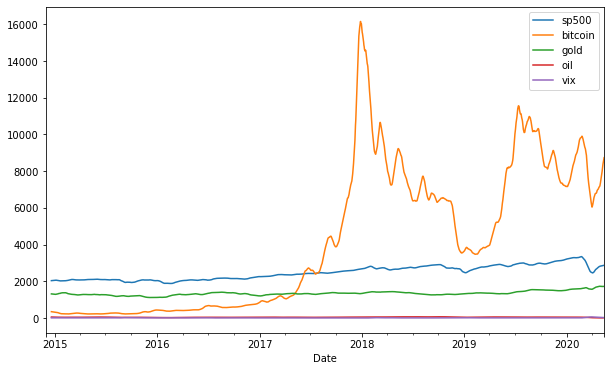

In [11]:
temp = df_close
temp.plot(figsize=(10,6))
plt.show()

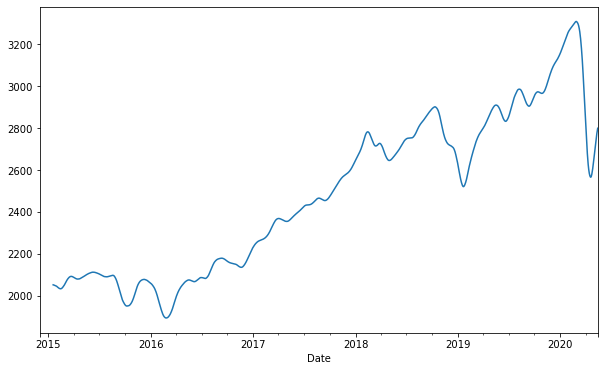

In [18]:
temp = df_close['sp500'].rolling(30).mean()
temp.plot(figsize=(10,6))
plt.show()

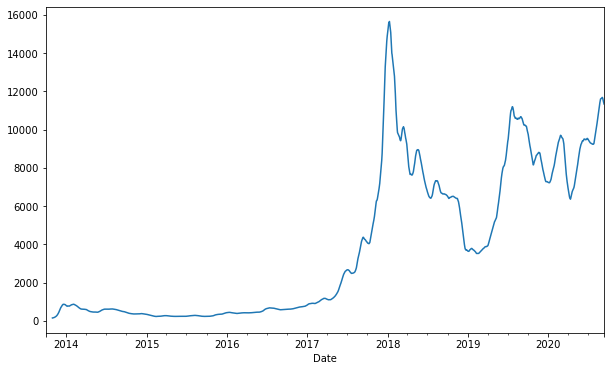

In [13]:
temp = df_bc['Close'].rolling(30).mean()
temp.plot(figsize=(10,6))
plt.show()